# Data Visualization

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\samee\Downloads\games_dataset.csv")

# Display the first few rows of the dataset
print(df.head())

                      Game Name       Genre         Platform  Release Year  \
0     Sekiro: Shadows Die Twice      Sports  Nintendo Switch          2014   
1                       Control      Puzzle  Nintendo Switch          2000   
2                      Among Us    Strategy  Nintendo Switch          2007   
3  Call of Duty: Modern Warfare     Stealth      PlayStation          2005   
4             League of Legends  Simulation               PC          2021   

   User Rating  
0     9.654719  
1     3.457386  
2     5.367622  
3     1.240325  
4     3.535476  


In [4]:
# Get basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Game Name     5000 non-null   object 
 1   Genre         5000 non-null   object 
 2   Platform      5000 non-null   object 
 3   Release Year  5000 non-null   int64  
 4   User Rating   5000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.4+ KB
None
Game Name       0
Genre           0
Platform        0
Release Year    0
User Rating     0
dtype: int64


## Descriptive Statistics

In [6]:
# Descriptive statistics for numerical columns
print(df.describe())

# Descriptive statistics for categorical columns
print(df['Genre'].value_counts())
print(df['Platform'].value_counts())


       Release Year  User Rating
count   5000.000000  5000.000000
mean    2011.375400     5.524913
std        6.943984     2.598429
min     2000.000000     1.005878
25%     2005.000000     3.260596
50%     2011.000000     5.574233
75%     2017.000000     7.802727
max     2023.000000     9.996196
Genre
Sports          403
Puzzle          384
Racing          369
Simulation      368
Stealth         360
Role-playing    360
Horror          356
Strategy        353
Survival        353
Adventure       342
Action          340
Platformer      338
Shooter         337
Fighting        337
Name: count, dtype: int64
Platform
PC                 1056
Xbox               1009
Nintendo Switch     989
Mobile              986
PlayStation         960
Name: count, dtype: int64


## Data Visualization

C:\Users\samee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


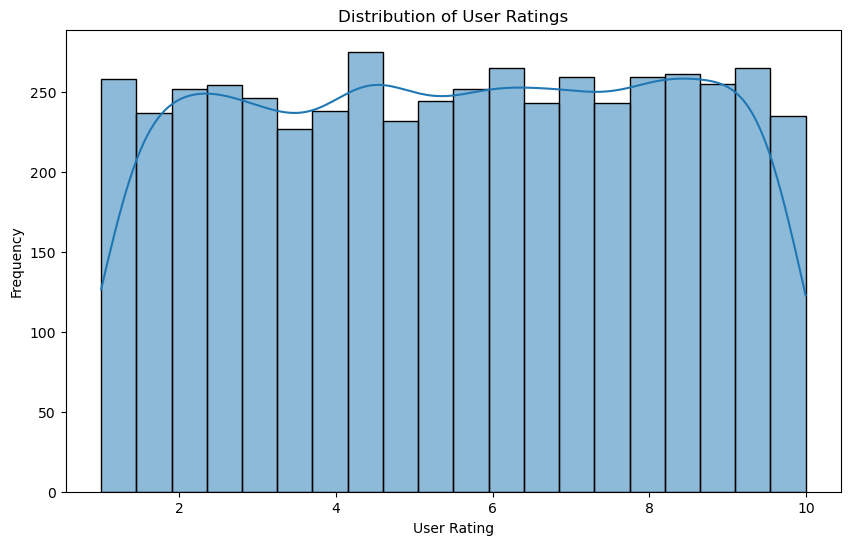

In [9]:
# Plot the distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['User Rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

The graph above illustrates the distribution of User Rating.

## Popular Genres

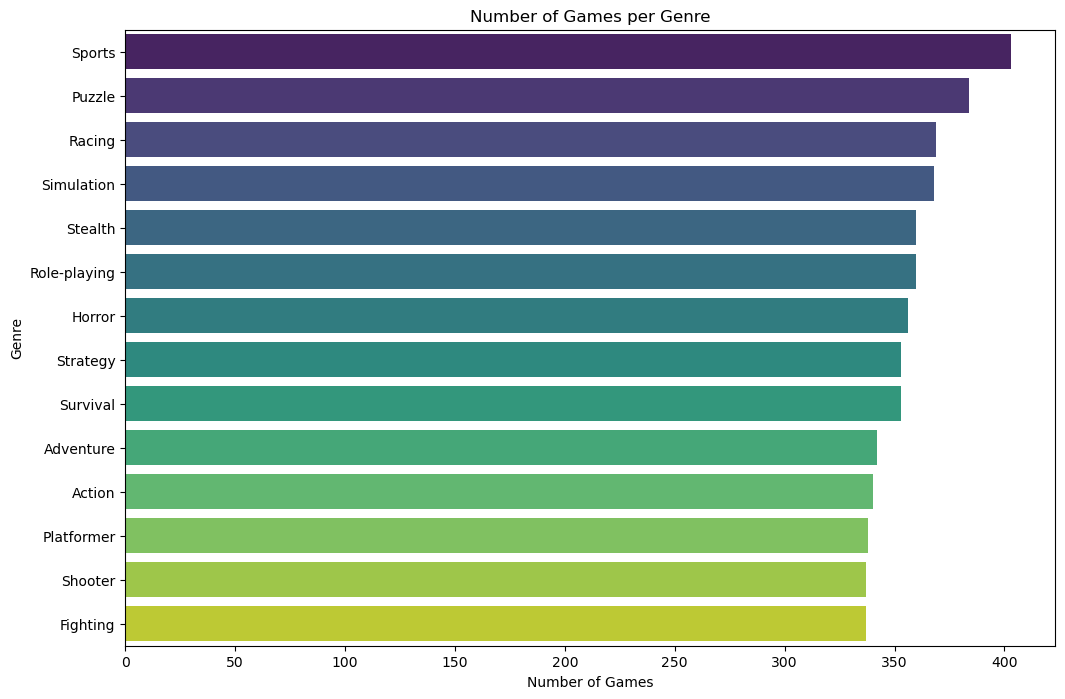

In [10]:
# Plot the count of games in each genre
plt.figure(figsize=(12, 8))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette="viridis")
plt.title('Number of Games per Genre')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

The graph above shows Sports and Puzzle games are the most common genres, while Fighting and Shooter games are less common.

## Games by Platform

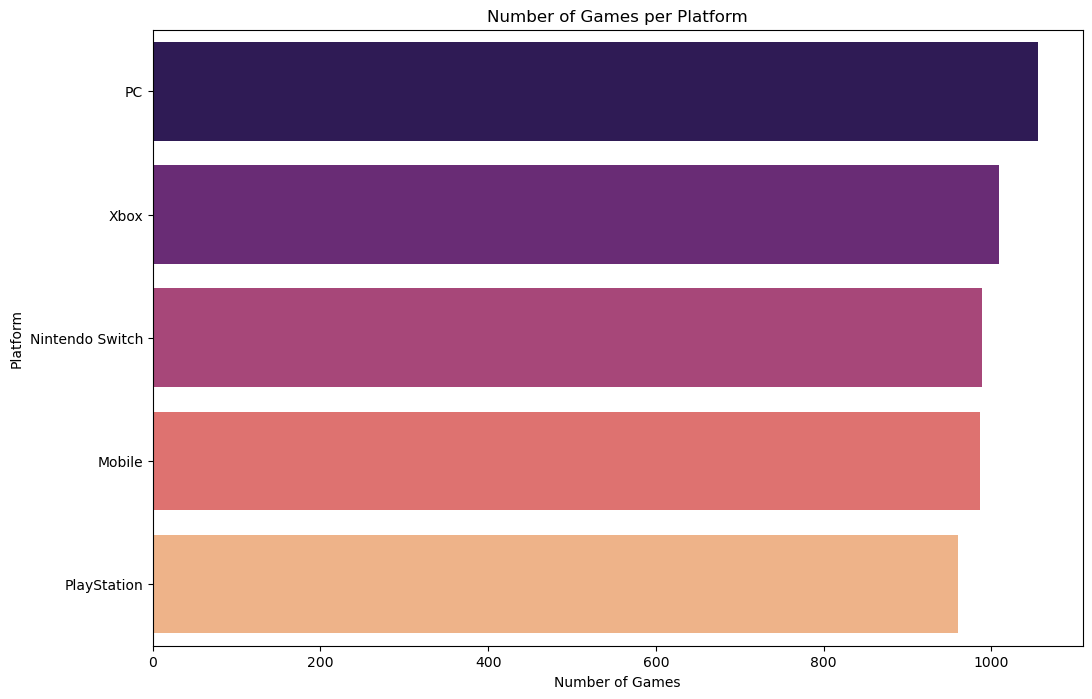

In [11]:
# Plot the count of games on each platform
plt.figure(figsize=(12, 8))
sns.countplot(y='Platform', data=df, order=df['Platform'].value_counts().index, palette='magma')
plt.title('Number of Games per Platform')
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.show()

The graph above shows PC has the highest count of games, followed by Xbox and Nintendo Switch.

## Average User Rating by Genre

C:\Users\samee\AppData\Local\Temp\ipykernel_111296\1186505564.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='User Rating', y='Genre', data=df, ci=None, estimator=pd.Series.mean, order=df.groupby('Genre')['User Rating'].mean().sort_values().index)


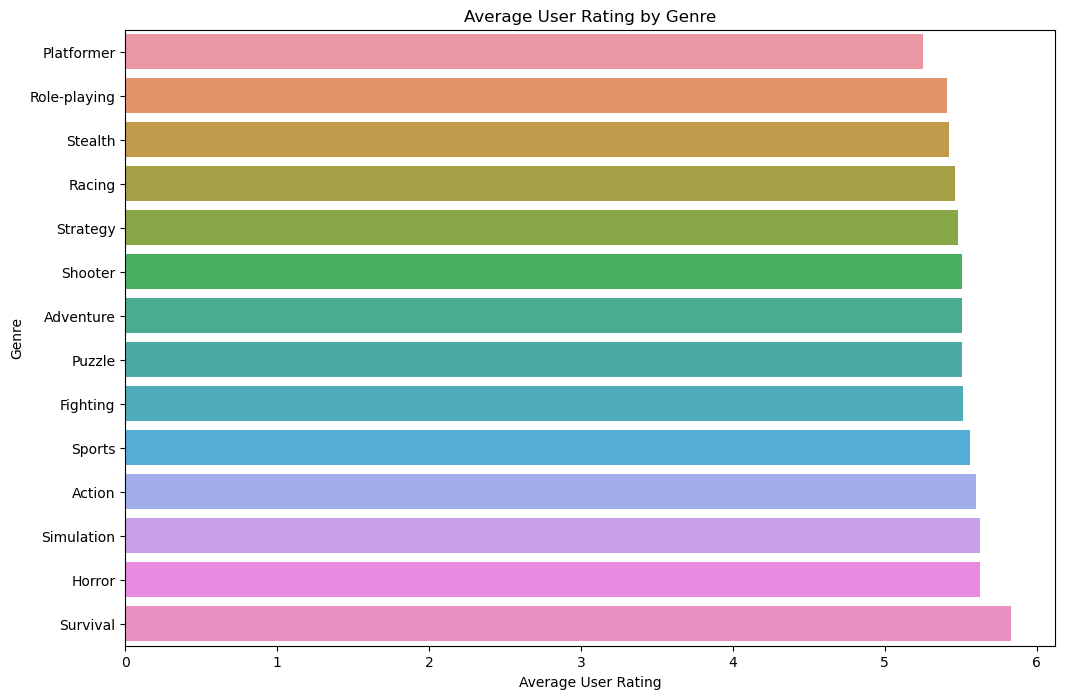

In [12]:
# Plot average user rating by genre
plt.figure(figsize=(12, 8))
sns.barplot(x='User Rating', y='Genre', data=df, ci=None, estimator=pd.Series.mean, order=df.groupby('Genre')['User Rating'].mean().sort_values().index)
plt.title('Average User Rating by Genre')
plt.xlabel('Average User Rating')
plt.ylabel('Genre')
plt.show()

The graph above illustrates the average user ratings across different gaming genres. Survival games received the highest average ratings, followed by Horror and Simulation.

## Average User Rating by Platform

C:\Users\samee\AppData\Local\Temp\ipykernel_111296\3760460775.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='User Rating', y='Platform', data=df, ci=None, estimator=pd.Series.mean, order=df.groupby('Platform')['User Rating'].mean().sort_values().index, palette="viridis")


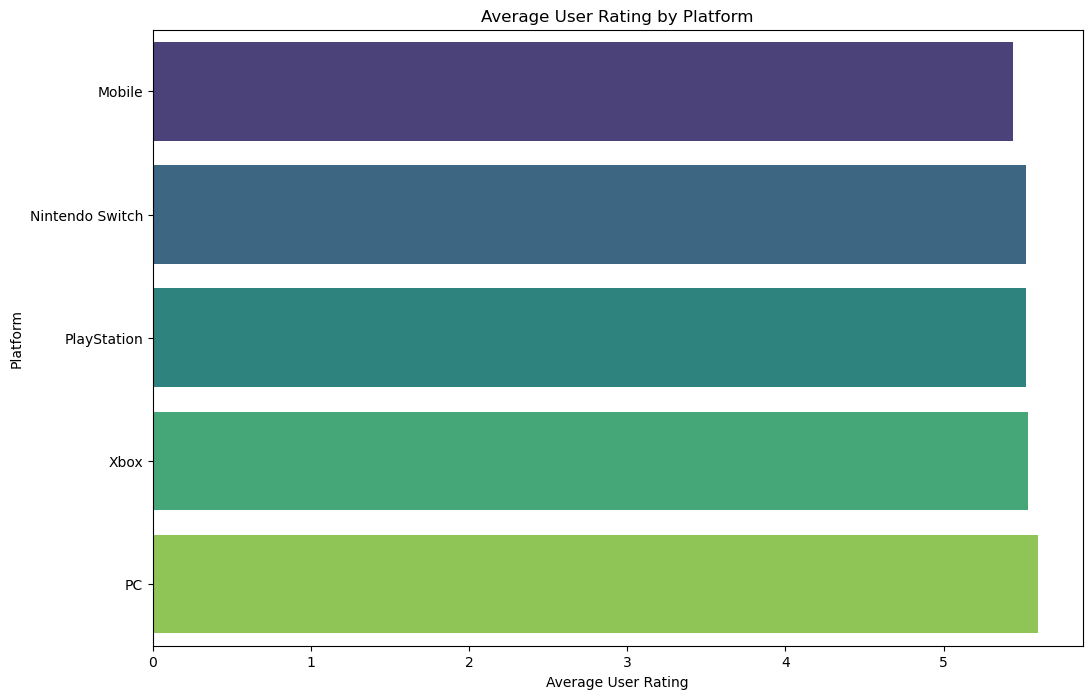

In [13]:
# Plot average user rating by platform
plt.figure(figsize=(12, 8))
sns.barplot(x='User Rating', y='Platform', data=df, ci=None, estimator=pd.Series.mean, order=df.groupby('Platform')['User Rating'].mean().sort_values().index, palette="viridis")
plt.title('Average User Rating by Platform')
plt.xlabel('Average User Rating')
plt.ylabel('Platform')
plt.show()

The graph above illustrates the average user ratings across different gaming platforms. PC platforms received the highest average ratings, followed by Xbox, PlayStation, Nintendo Switch, and Mobile. This suggests that users may have a stronger preference for gaming experiences on PC platforms, while the other platforms have relatively similar ratings, indicating a more evenly distributed satisfaction among users across these platforms.

## Top-Rated games

In [6]:
# Find the top-rated games
top_rated_games = df.sort_values(by='User Rating', ascending=False).head(10)
print(top_rated_games[['Game Name', 'User Rating']])

                     Game Name  User Rating
2627                  NBA 2K21     9.996196
2666                 Minecraft     9.994527
3213                   Control     9.993194
664                   Valorant     9.988694
3777                Elden Ring     9.988145
1469                 Overwatch     9.987679
3647               PUBG Mobile     9.987600
871   The Witcher 3: Wild Hunt     9.987243
1799         World of Warcraft     9.987004
1847       Super Mario Odyssey     9.980222


## Release Year Analysis

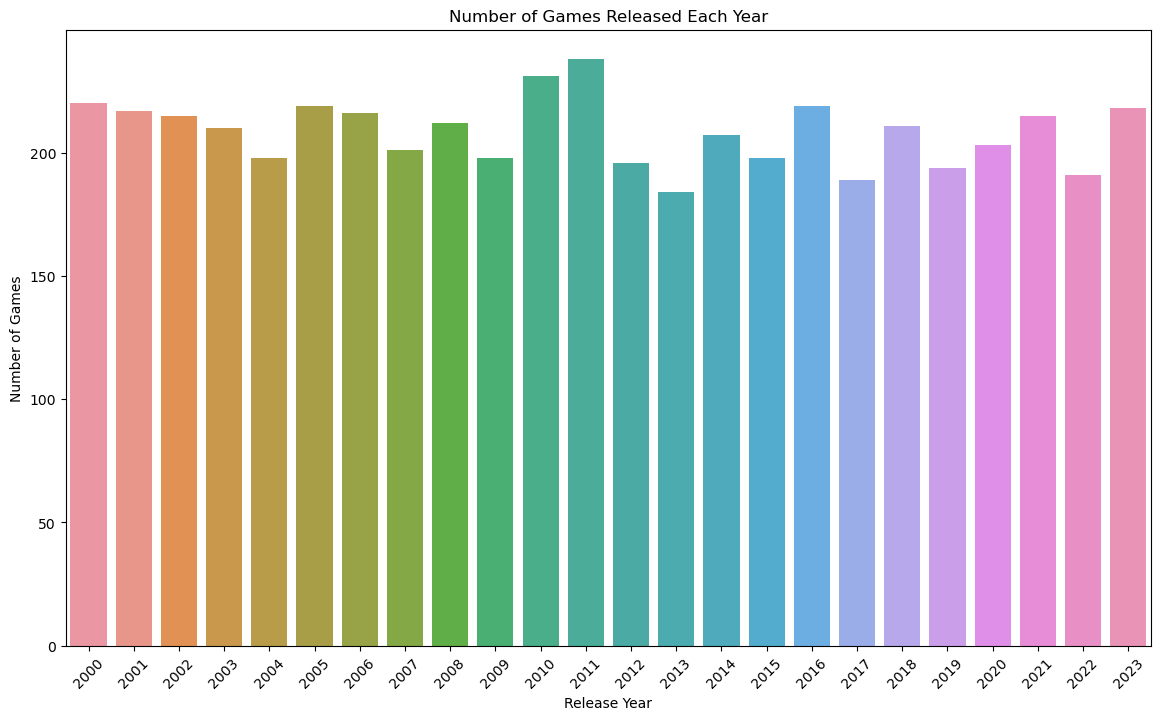

In [72]:
# Plot the number of games released each year
plt.figure(figsize=(14, 8))
sns.countplot(x='Release Year', data=df, order=df['Release Year'].value_counts().index.sort_values())
plt.title('Number of Games Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

The graph above shows a relatively steady number of game releases each year from 2000 to 2023, with a peak around 2011 and a slight decline in releases during the years following. This steady trend suggests consistent production within the gaming industry, with occasional increases or decreases.

## Trend Analysis: Analyze trends over time, such as Average Ratings per Year.

C:\Users\samee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


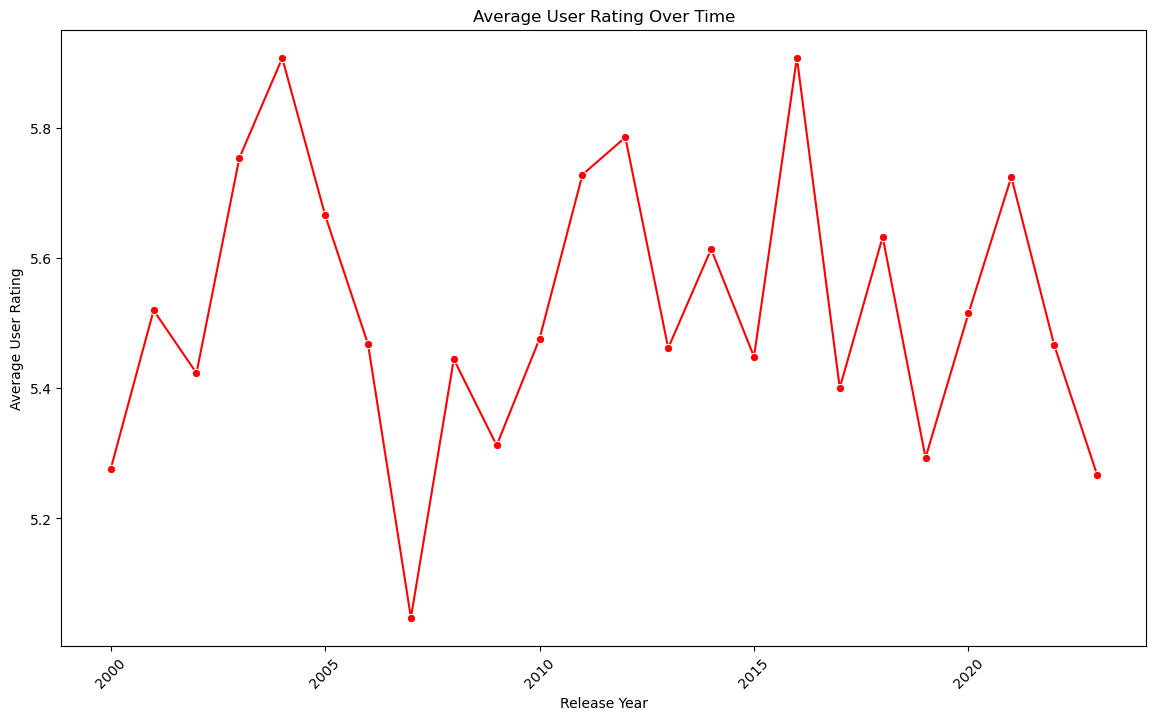

In [59]:
# Calculate average user rating per release year
average_rating_per_year = df.groupby('Release Year')['User Rating'].mean()

# Plot the trend of average user rating over the years
plt.figure(figsize=(14, 8))
sns.lineplot(x=average_rating_per_year.index, y=average_rating_per_year.values, marker='o', color='r')
plt.title('Average User Rating Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45)
plt.show()

The graph above shows that average user ratings have fluctuated significantly between 2000 and 2020, with peaks around 2004 and 2015, and dips around 2007 and 2018. This indicates varying user satisfaction over the years, influenced by factors like changes in game quality, technology, and player expectations.

[Go to Introduction](./Introduction.ipynb) 

[Go to Data Visualization](./Data_Visualization.ipynb) 

[Go to Findings and Conclusion](./Findings_and_Conclusion.ipynb)